## Task:- 3 Linear Regression
### Objective: Implement and understand simple & multiple linear regression.
### Tools: Scikit-learn, Pandas, Matplotlib

# Linear Regression Analysis: Simple and Multiple Regression Implementation

## Introduction

Linear regression is one of the fundamental machine learning algorithms that forms the foundation for understanding predictive modeling. This notebook demonstrates the implementation and interpretation of both **simple linear regression** (one predictor variable) and **multiple linear regression** (multiple predictor variables) using Python's scientific computing ecosystem.

## Learning Objectives

By the end of this analysis, you will understand:

- The mathematical concepts behind linear regression
- How to prepare data for regression analysis
- The difference between simple and multiple linear regression
- How to interpret regression coefficients and model performance metrics
- Practical implementation using industry-standard tools

## What is Linear Regression?

Linear regression assumes a linear relationship between input features (independent variables) and a target variable (dependent variable). The algorithm finds the best-fitting line through data points by minimizing prediction errors.

### Simple Linear Regression
Models the relationship between **one** predictor variable and the target:
```
y = β₀ + β₁x + ε
```
Where:
- y = target variable
- x = predictor variable  
- β₀ = intercept (y-value when x = 0)
- β₁ = slope (change in y for unit change in x)
- ε = error term

### Multiple Linear Regression
Extends the concept to **multiple** predictor variables:
```
y = β₀ + β₁x₁ + β₂x₂ + ... + βₙxₙ + ε
```
Where each βᵢ represents the change in y for a unit change in xᵢ, holding all other variables constant.

## Tools and Libraries

This analysis leverages three essential Python libraries:

### Pandas
- **Purpose**: Data manipulation and analysis
- **Key Functions**: Loading datasets, data cleaning, exploratory data analysis
- **Why Important**: Provides intuitive data structures and operations for handling real-world datasets

### Scikit-learn
- **Purpose**: Machine learning implementation
- **Key Functions**: Model training, prediction, performance evaluation
- **Why Important**: Industry-standard library with consistent API and robust implementations

### Matplotlib
- **Purpose**: Data visualization
- **Key Functions**: Creating plots, charts, and visual analysis
- **Why Important**: Essential for understanding data patterns and model performance

## Methodology Overview

Our analysis follows a systematic approach:

### 1. Data Preparation Phase
- Load and examine the dataset structure
- Identify and handle missing values, outliers, and data quality issues
- Understand variable types and distributions

### 2. Exploratory Data Analysis
- Visualize relationships between variables
- Calculate correlation coefficients
- Identify potential predictor variables through statistical analysis

### 3. Simple Linear Regression Implementation
- Select the most correlated predictor variable
- Train the model and interpret coefficients
- Evaluate performance using standard metrics
- Visualize the regression line and residuals

### 4. Multiple Linear Regression Implementation
- Select multiple relevant predictor variables
- Train the comprehensive model
- Compare performance with simple regression
- Analyze feature importance and interactions

### 5. Model Evaluation and Comparison
- Calculate and interpret performance metrics
- Compare simple vs multiple regression approaches
- Identify strengths and limitations of each method

## Key Performance Metrics

We will evaluate our models using several important metrics:

### R-squared (R²)
- **Range**: 0 to 1
- **Interpretation**: Proportion of variance in the target variable explained by the model
- **Good Values**: Higher values indicate better fit (typically > 0.7 for good models)

### Mean Squared Error (MSE)
- **Range**: 0 to ∞ 
- **Interpretation**: Average squared difference between actual and predicted values
- **Good Values**: Lower values indicate better performance

### Root Mean Squared Error (RMSE)
- **Range**: 0 to ∞
- **Interpretation**: Square root of MSE, in same units as target variable
- **Good Values**: Lower values indicate better performance, easier to interpret than MSE

### Mean Absolute Error (MAE)
- **Range**: 0 to ∞
- **Interpretation**: Average absolute difference between actual and predicted values
- **Good Values**: Lower values indicate better performance, less sensitive to outliers than MSE

## Expected Outcomes

Through this hands-on implementation, you will gain practical experience in:

- **Data Science Workflow**: Following a structured approach from data exploration to model evaluation
- **Statistical Interpretation**: Understanding what regression coefficients tell us about variable relationships
- **Model Comparison**: Learning when to use simple vs multiple regression
- **Performance Assessment**: Evaluating model quality using multiple metrics
- **Visualization Skills**: Creating meaningful plots to communicate findings

## Real-World Applications

Linear regression is widely used across industries for:

- **Business**: Sales forecasting, price optimization, demand prediction
- **Finance**: Risk assessment, stock price analysis, economic modeling  
- **Healthcare**: Treatment outcome prediction, cost analysis
- **Engineering**: Performance optimization, quality control
- **Social Sciences**: Survey analysis, behavioral modeling

---

*This notebook provides a comprehensive introduction to linear regression concepts and practical implementation. Each section builds upon previous knowledge, ensuring a thorough understanding of both theoretical concepts and practical application skills.*
```

# Let's Begin 

In [1]:
### import necessary libraries for this
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# PHASE 1: DATA PREPARATION


In [3]:

print("=" * 60)
print("HOUSING PRICE PREDICTION - LINEAR REGRESSION ANALYSIS")
print("=" * 60)

# Load the dataset
df = pd.read_csv('Housing.csv')


HOUSING PRICE PREDICTION - LINEAR REGRESSION ANALYSIS


In [4]:


print("\n1. DATASET OVERVIEW")
print("-" * 30)
print(f"Dataset shape: {df.shape}")
print(f"Number of features: {df.shape[1] - 1}")
print(f"Number of samples: {df.shape[0]}")




1. DATASET OVERVIEW
------------------------------
Dataset shape: (545, 13)
Number of features: 12
Number of samples: 545


In [5]:


# Display basic information
print("\n2. DATASET INFO")
print("-" * 30)
print(df.info())




2. DATASET INFO
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
None


In [6]:
print("\n3. FIRST FEW ROWS")
print("-" * 30)
print(df.head())


3. FIRST FEW ROWS
------------------------------
      price  area  bedrooms  bathrooms  stories mainroad guestroom basement  \
0  13300000  7420         4          2        3      yes        no       no   
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished  


In [7]:
print("\n4. STATISTICAL SUMMARY")
print("-" * 30)
print(df.describe())


4. STATISTICAL SUMMARY
------------------------------
              price          area    bedrooms   bathrooms     stories  \
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000   
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000  


In [8]:
print("\n5. MISSING VALUES CHECK")
print("-" * 30)
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0] if missing_values.sum() > 0 else "No missing values found!")


5. MISSING VALUES CHECK
------------------------------
No missing values found!


In [9]:
print("\n6. DATA TYPES")
print("-" * 30)
print(df.dtypes)


6. DATA TYPES
------------------------------
price                int64
area                 int64
bedrooms             int64
bathrooms            int64
stories              int64
mainroad            object
guestroom           object
basement            object
hotwaterheating     object
airconditioning     object
parking              int64
prefarea            object
furnishingstatus    object
dtype: object


*Interpretation*
 - It contains 6 numeriacal value and 7 categorical datatype.

# PHASE 2: DATA PREPROCESSING


In [10]:
print("\n\n" + "=" * 60)
print("DATA PREPROCESSING")
print("=" * 60)

# Create a copy for preprocessing# Create a copy for preprocessing
df_processed = df.copy()
print(f"Starting with {df_processed.shape[0]} rows")



DATA PREPROCESSING
Starting with 545 rows


In [11]:
# Check for missing values in original data
print("\nMissing values in original data:")
missing_original = df_processed.isnull().sum()
print(missing_original)


Missing values in original data:
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0
basement            0
hotwaterheating     0
airconditioning     0
parking             0
prefarea            0
furnishingstatus    0
dtype: int64


In [12]:
# Identify categorical columns (yes/no columns)
categorical_columns = []
for col in df_processed.columns:
    if df_processed[col].dtype == 'object' and col not in ['furnishingstatus']:
        categorical_columns.append(col)

print(f"\nCategorical columns (yes/no): {categorical_columns}")



Categorical columns (yes/no): ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']


In [13]:
# Convert yes/no to 1/0 - but check values first
le = LabelEncoder()
for col in categorical_columns:
    unique_values = df_processed[col].unique()
    print(f"Unique values in {col}: {unique_values}")
    
    # Only encode if we have valid data
    if len(unique_values) > 0 and not df_processed[col].isnull().all():
        df_processed[col] = le.fit_transform(df_processed[col])
    else:
        print(f"WARNING: Column {col} has no valid data to encode")

Unique values in mainroad: ['yes' 'no']
Unique values in guestroom: ['no' 'yes']
Unique values in basement: ['no' 'yes']
Unique values in hotwaterheating: ['no' 'yes']
Unique values in airconditioning: ['yes' 'no']
Unique values in prefarea: ['yes' 'no']


In [14]:
# Handle furnishingstatus with proper encoding
if 'furnishingstatus' in df_processed.columns:
    print(f"\nUnique values in furnishingstatus: {df_processed['furnishingstatus'].unique()}")
    furnishing_mapping = {'unfurnished': 0, 'semi-furnished': 1, 'furnished': 2}
    
    # Check if all values can be mapped
    unmapped_values = set(df_processed['furnishingstatus'].unique()) - set(furnishing_mapping.keys())
    if unmapped_values:
        print(f"WARNING: Unmapped furnishing values: {unmapped_values}")
    
    df_processed['furnishingstatus'] = df_processed['furnishingstatus'].map(furnishing_mapping)
    print(f"Furnishing status mapping applied")


Unique values in furnishingstatus: ['furnished' 'semi-furnished' 'unfurnished']
Furnishing status mapping applied


In [15]:
# Check for missing values after preprocessing
print(f"\nMissing values after preprocessing:")
missing_after = df_processed.isnull().sum()
total_missing = missing_after.sum()
print(missing_after[missing_after > 0] if total_missing > 0 else "No missing values after preprocessing")



Missing values after preprocessing:
No missing values after preprocessing


In [16]:
# CAREFUL handling of missing values
if total_missing > 0:
    print(f"\nTotal missing values: {total_missing}")
    rows_before = df_processed.shape[0]
    
    # Only drop rows if we won't lose all data
    rows_with_all_nan = df_processed.isnull().all(axis=1).sum()
    rows_with_any_nan = df_processed.isnull().any(axis=1).sum()
    
    print(f"Rows with all NaN: {rows_with_all_nan}")
    print(f"Rows with any NaN: {rows_with_any_nan}")
    
    if rows_with_any_nan < rows_before * 0.8:  # Only drop if losing less than 80% of data
        df_processed = df_processed.dropna()
        rows_after = df_processed.shape[0]
        print(f"Dropped {rows_before - rows_after} rows with missing values")
    else:
        print("Too many rows would be dropped. Using imputation instead...")
        # Fill missing values instead of dropping
        for col in df_processed.columns:
            if df_processed[col].dtype in ['int64', 'float64']:
                df_processed[col].fillna(df_processed[col].median(), inplace=True)
            else:
                df_processed[col].fillna(df_processed[col].mode()[0] if not df_processed[col].mode().empty else 0, inplace=True)

print(f"\nFinal dataset shape: {df_processed.shape}")


Final dataset shape: (545, 13)


In [17]:
# Ensure we still have data
if df_processed.shape[0] == 0:
    print("ERROR: No data remaining after preprocessing!")
    print("Reverting to original data...")
    df_processed = df.copy()
    
    # Apply minimal preprocessing
    for col in categorical_columns:
        if df_processed[col].dtype == 'object':
            df_processed[col] = pd.Categorical(df_processed[col]).codes
    
    if 'furnishingstatus' in df_processed.columns:
        df_processed['furnishingstatus'] = pd.Categorical(df_processed['furnishingstatus']).codes
    
    print(f"Reverted dataset shape: {df_processed.shape}")

print("Sample of final processed data:")
print(df_processed.head())

Sample of final processed data:
      price  area  bedrooms  bathrooms  stories  mainroad  guestroom  \
0  13300000  7420         4          2        3         1          0   
1  12250000  8960         4          4        4         1          0   
2  12250000  9960         3          2        2         1          0   
3  12215000  7500         4          2        2         1          0   
4  11410000  7420         4          1        2         1          1   

   basement  hotwaterheating  airconditioning  parking  prefarea  \
0         0                0                1        2         1   
1         0                0                1        3         0   
2         1                0                0        2         1   
3         1                0                1        3         1   
4         1                0                1        2         0   

   furnishingstatus  
0                 2  
1                 2  
2                 1  
3                 2  
4               

# PHASE 3: EXPLORATORY DATA ANALYSIS


In [18]:
print("\n\n" + "=" * 60)
print("EXPLORATORY DATA ANALYSIS")
print("=" * 60)

# Target variable analysis
target = 'price'
features = [col for col in df_processed.columns if col != target]

print(f"\nTarget variable: {target}")
print(f"Features: {features}")




EXPLORATORY DATA ANALYSIS

Target variable: price
Features: ['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'parking', 'prefarea', 'furnishingstatus']


Text(0, 0.5, 'Frequency')

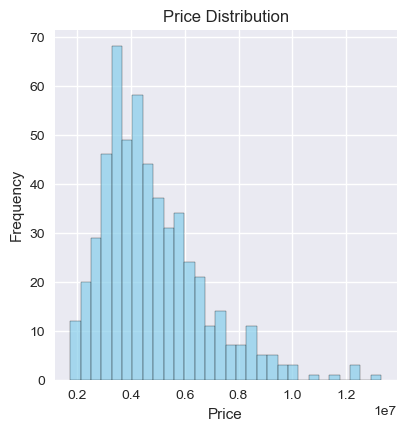

In [19]:
# Price distribution
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 1)
plt.hist(df_processed[target], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')

Text(0, 0.5, 'Price')

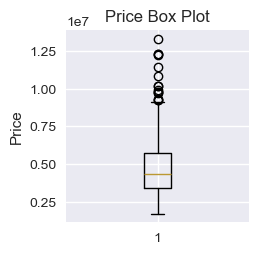

In [20]:
# Price statistics
plt.subplot(2, 3, 2)
plt.boxplot(df_processed[target])
plt.title('Price Box Plot')
plt.ylabel('Price')

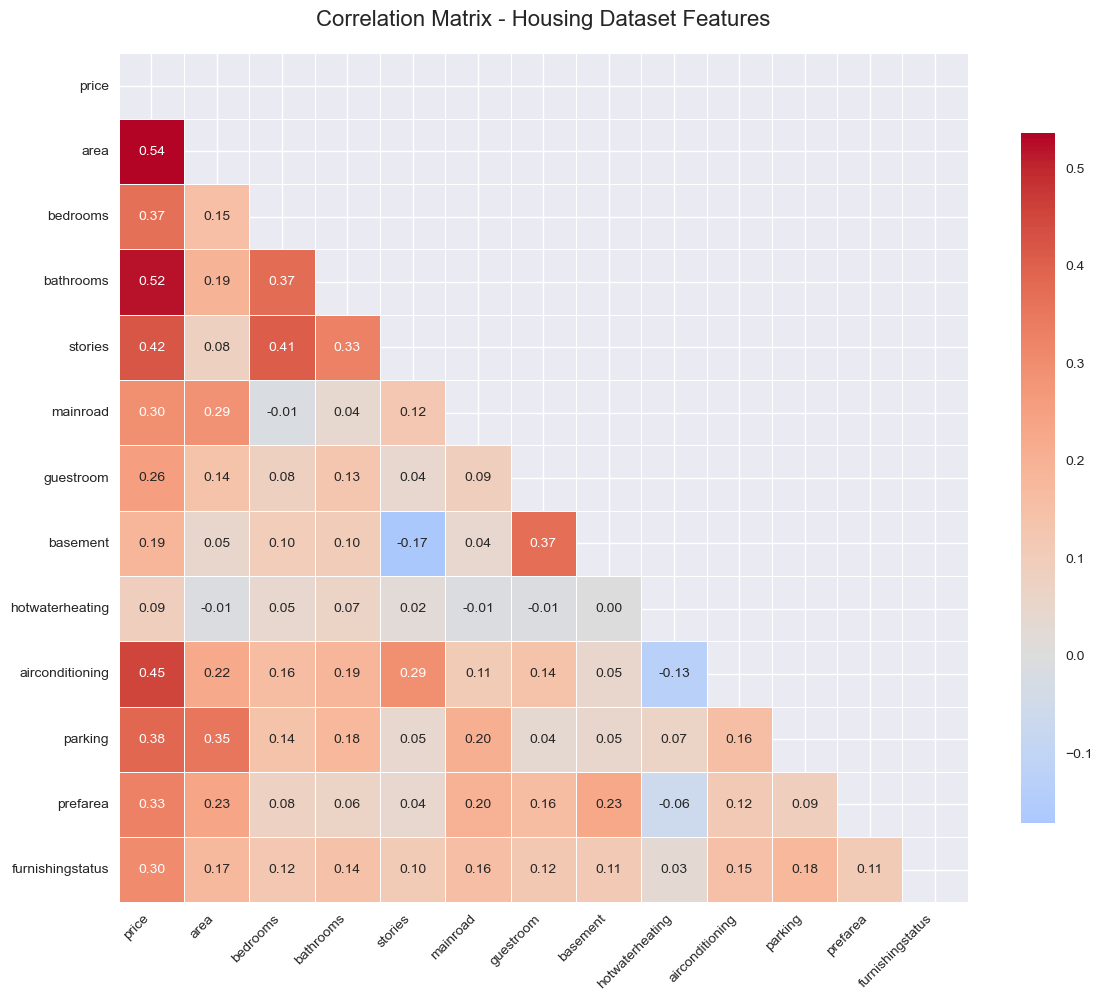

<Figure size 1500x1000 with 0 Axes>

<Figure size 1500x1000 with 0 Axes>

In [21]:
# Create a dedicated large correlation matrix plot
plt.figure(figsize=(12, 10))
correlation_matrix = df_processed.corr()
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, 
            annot_kws={"size": 10}, fmt='.2f')
plt.title('Correlation Matrix - Housing Dataset Features', fontsize=16, pad=20)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(rotation=0, fontsize=10)
plt.tight_layout()
plt.show()

# Continue with the original subplot layout but remove correlation from it
plt.figure(figsize=(15, 10))

In [22]:
# Top correlations with price
price_corr = correlation_matrix[target].abs().sort_values(ascending=False)
print(f"\nCorrelations with {target}:")
print(price_corr)


Correlations with price:
price               1.000000
area                0.535997
bathrooms           0.517545
airconditioning     0.452954
stories             0.420712
parking             0.384394
bedrooms            0.366494
prefarea            0.329777
furnishingstatus    0.304721
mainroad            0.296898
guestroom           0.255517
basement            0.187057
hotwaterheating     0.093073
Name: price, dtype: float64


In [23]:
# Scatter plots for top numerical features
numerical_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']


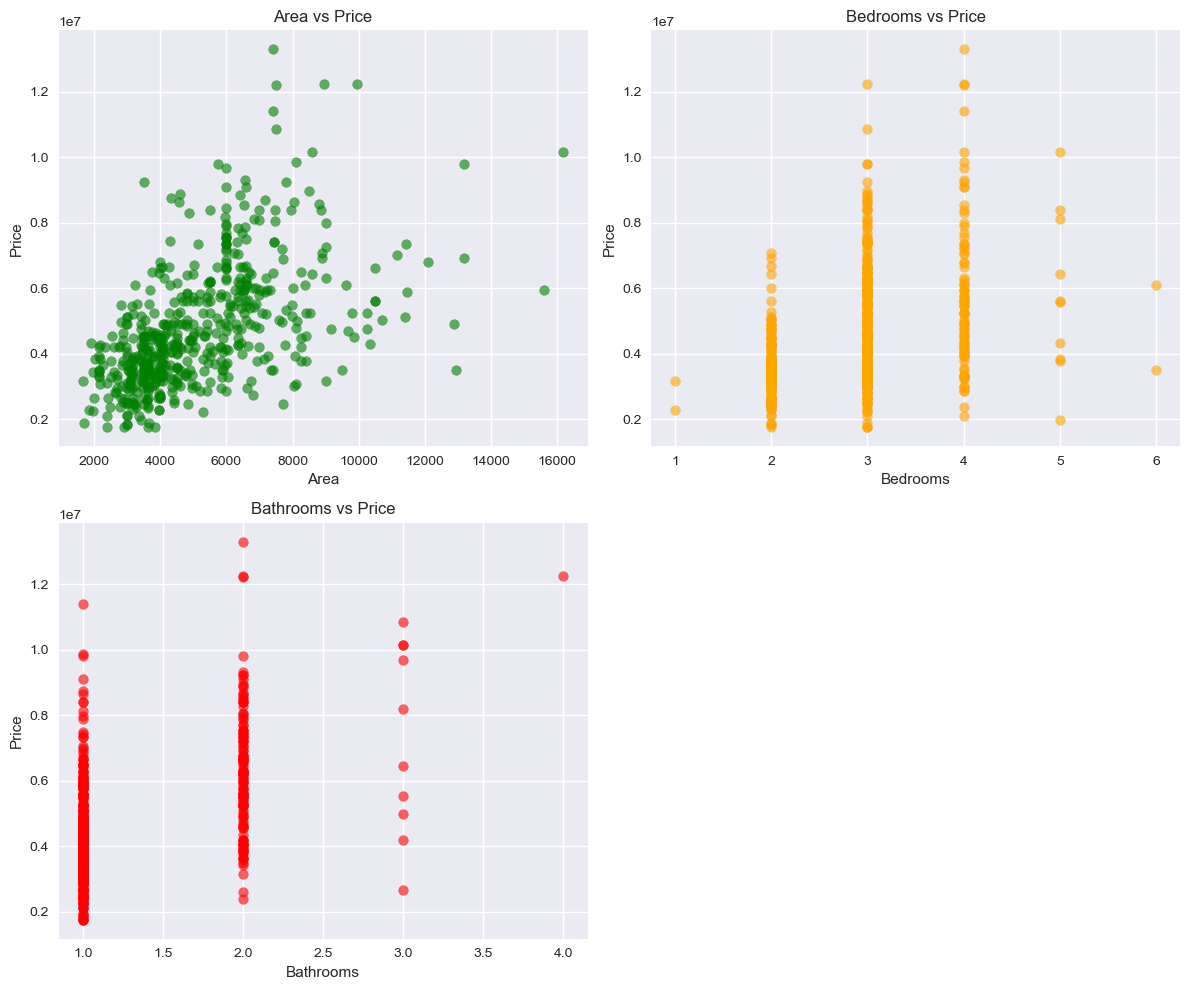

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

# Area vs Price
plt.subplot(2, 2, 1)
plt.scatter(df_processed['area'], df_processed[target], alpha=0.6, color='green')
plt.title('Area vs Price')
plt.xlabel('Area')
plt.ylabel('Price')

# Bedrooms vs Price
plt.subplot(2, 2, 2)
plt.scatter(df_processed['bedrooms'], df_processed[target], alpha=0.6, color='orange')
plt.title('Bedrooms vs Price')
plt.xlabel('Bedrooms')
plt.ylabel('Price')

# Bathrooms vs Price
plt.subplot(2, 2, 3)
plt.scatter(df_processed['bathrooms'], df_processed[target], alpha=0.6, color='red')
plt.title('Bathrooms vs Price')
plt.xlabel('Bathrooms')
plt.ylabel('Price')

plt.tight_layout()
plt.show()


# PHASE 4: SIMPLE LINEAR REGRESSION

In [25]:
print("\n\n" + "=" * 60)
print("SIMPLE LINEAR REGRESSION")
print("=" * 60)

# Select the feature with highest correlation with price (excluding price itself)
best_feature = price_corr.drop(target).index[0]
print(f"\nSelected feature for simple regression: {best_feature}")
print(f"Correlation with price: {price_corr[best_feature]:.4f}")

# Prepare data for simple linear regression
X_simple = df_processed[[best_feature]].values
y = df_processed[target].values

print(f"\nSimple regression - Feature shape: {X_simple.shape}")
print(f"Target shape: {y.shape}")




SIMPLE LINEAR REGRESSION

Selected feature for simple regression: area
Correlation with price: 0.5360

Simple regression - Feature shape: (545, 1)
Target shape: (545,)


In [26]:
# Diagnostic - check data shapes
print("=== DATA DIAGNOSTIC ===")
print(f"Original df shape: {df.shape}")
print(f"Processed df shape: {df_processed.shape}")
print(f"X_simple shape: {X_simple.shape}")
print(f"y shape: {y.shape}")
print(f"best_feature: {best_feature}")

# Check if X_simple and y are empty
if X_simple.shape[0] == 0:
    print("ERROR: X_simple is empty!")
if y.shape[0] == 0:
    print("ERROR: y is empty!")

# Check the actual data
print(f"X_simple first 5 rows:\n{X_simple[:5] if X_simple.shape[0] > 0 else 'EMPTY'}")
print(f"y first 5 values:\n{y[:5] if y.shape[0] > 0 else 'EMPTY'}")

=== DATA DIAGNOSTIC ===
Original df shape: (545, 13)
Processed df shape: (545, 13)
X_simple shape: (545, 1)
y shape: (545,)
best_feature: area
X_simple first 5 rows:
[[7420]
 [8960]
 [9960]
 [7500]
 [7420]]
y first 5 values:
[13300000 12250000 12250000 12215000 11410000]


In [27]:
# Validation before train_test_split
print("\n=== PRE-SPLIT VALIDATION ===")
print(f"df_processed shape: {df_processed.shape}")
print(f"best_feature: {best_feature}")

# Make sure the best_feature exists and has data
if best_feature not in df_processed.columns:
    print(f"ERROR: {best_feature} not found in columns: {df_processed.columns.tolist()}")
    # Fallback to first numerical column
    numerical_cols = df_processed.select_dtypes(include=[np.number]).columns
    best_feature = numerical_cols[0] if len(numerical_cols) > 0 else df_processed.columns[0]
    print(f"Using fallback feature: {best_feature}")

# Prepare data for simple linear regression
X_simple = df_processed[[best_feature]]
y = df_processed['price'] if 'price' in df_processed.columns else df_processed.iloc[:, -1]  # Fallback to last column

print(f"X_simple shape: {X_simple.shape}")
print(f"y shape: {y.shape}")

# Check for empty data
if X_simple.shape[0] == 0 or y.shape[0] == 0:
    print("ERROR: Empty data detected!")
    print("Cannot proceed with empty dataset")
else:
    print("✓ Data validation passed")
    
    # Convert to numpy arrays
    X_simple = X_simple.values
    y = y.values
    
    print(f"Final X_simple shape: {X_simple.shape}")
    print(f"Final y shape: {y.shape}")


=== PRE-SPLIT VALIDATION ===
df_processed shape: (545, 13)
best_feature: area
X_simple shape: (545, 1)
y shape: (545,)
✓ Data validation passed
Final X_simple shape: (545, 1)
Final y shape: (545,)


In [28]:
# Split data
X_train_simple, X_test_simple, y_train, y_test = train_test_split(
    X_simple, y, test_size=0.2, random_state=42
)

print(f"Training set size: {X_train_simple.shape[0]}")
print(f"Test set size: {X_test_simple.shape[0]}")

# Train simple linear regression model
simple_model = LinearRegression()
simple_model.fit(X_train_simple, y_train)

# Make predictions
y_pred_simple_train = simple_model.predict(X_train_simple)
y_pred_simple_test = simple_model.predict(X_test_simple)

# Model parameters
print(f"\nSimple Linear Regression Results:")
print(f"Intercept: {simple_model.intercept_:,.2f}")
print(f"Coefficient for {best_feature}: {simple_model.coef_[0]:.2f}")

# Interpretation
print(f"\nModel Interpretation:")
print(f"For every 1 unit increase in {best_feature}, price increases by {simple_model.coef_[0]:.2f}")
print(f"Base price (when {best_feature} = 0): {simple_model.intercept_:,.2f}")


Training set size: 436
Test set size: 109

Simple Linear Regression Results:
Intercept: 2,512,254.26
Coefficient for area: 425.73

Model Interpretation:
For every 1 unit increase in area, price increases by 425.73
Base price (when area = 0): 2,512,254.26


In [29]:
# Calculate metrics for simple regression
mse_simple_train = mean_squared_error(y_train, y_pred_simple_train)
mse_simple_test = mean_squared_error(y_test, y_pred_simple_test)
rmse_simple_train = np.sqrt(mse_simple_train)
rmse_simple_test = np.sqrt(mse_simple_test)
mae_simple_train = mean_absolute_error(y_train, y_pred_simple_train)
mae_simple_test = mean_absolute_error(y_test, y_pred_simple_test)
r2_simple_train = r2_score(y_train, y_pred_simple_train)
r2_simple_test = r2_score(y_test, y_pred_simple_test)

print(f"\nSimple Regression Performance:")
print(f"Training Set:")
print(f"  MSE: {mse_simple_train:,.2f}")
print(f"  RMSE: {rmse_simple_train:,.2f}")
print(f"  MAE: {mae_simple_train:,.2f}")
print(f"  R² Score: {r2_simple_train:.4f}")

print(f"Test Set:")
print(f"  MSE: {mse_simple_test:,.2f}")
print(f"  RMSE: {rmse_simple_test:,.2f}")
print(f"  MAE: {mae_simple_test:,.2f}")
print(f"  R² Score: {r2_simple_test:.4f}")




Simple Regression Performance:
Training Set:
  MSE: 2,204,738,681,379.34
  RMSE: 1,484,836.25
  MAE: 1,092,585.59
  R² Score: 0.2850
Test Set:
  MSE: 3,675,286,604,768.19
  RMSE: 1,917,103.70
  MAE: 1,474,748.13
  R² Score: 0.2729


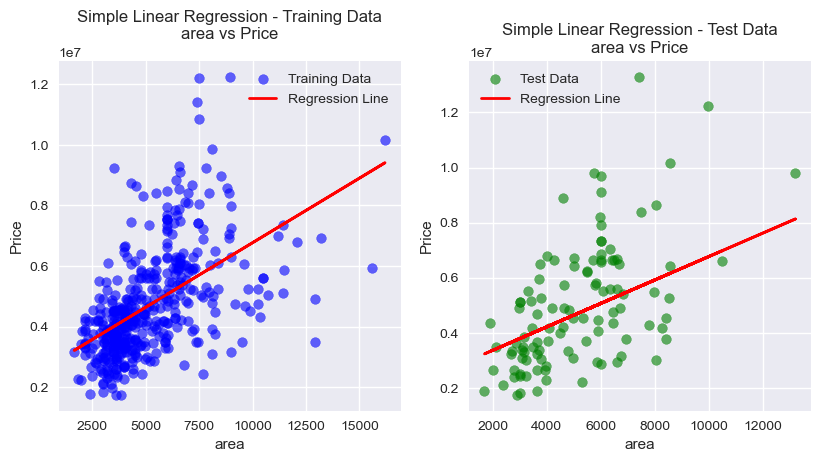

In [30]:
# Visualize simple linear regression
plt.figure(figsize=(15, 10))

# Training data with regression line
plt.subplot(2, 3, 1)
plt.scatter(X_train_simple, y_train, alpha=0.6, label='Training Data', color='blue')
plt.plot(X_train_simple, y_pred_simple_train, 'r-', label='Regression Line', linewidth=2)
plt.xlabel(best_feature)
plt.ylabel('Price')
plt.title(f'Simple Linear Regression - Training Data\n{best_feature} vs Price')
plt.legend()

# Test data with regression line
plt.subplot(2, 3, 2)
plt.scatter(X_test_simple, y_test, alpha=0.6, label='Test Data', color='green')
plt.plot(X_test_simple, y_pred_simple_test, 'r-', label='Regression Line', linewidth=2)
plt.xlabel(best_feature)
plt.ylabel('Price')
plt.title(f'Simple Linear Regression - Test Data\n{best_feature} vs Price')
plt.legend()



Text(0.5, 1.0, 'Actual vs Predicted (Simple)\nR² = 0.2729')

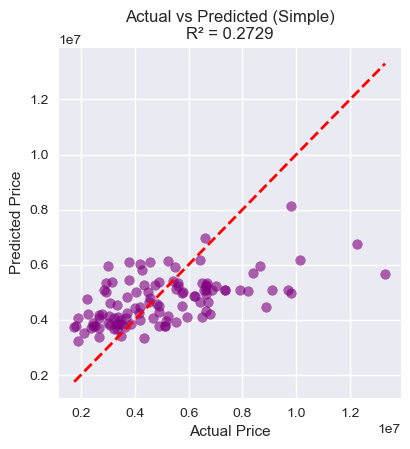

In [31]:
plt.figure(figsize=(15, 10))
# Actual vs Predicted (Test)
plt.subplot(2, 3, 1)
plt.scatter(y_test, y_pred_simple_test, alpha=0.6, color='purple')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Actual vs Predicted (Simple)\nR² = {r2_simple_test:.4f}')



Text(0.5, 1.0, 'Residuals Distribution (Simple)')

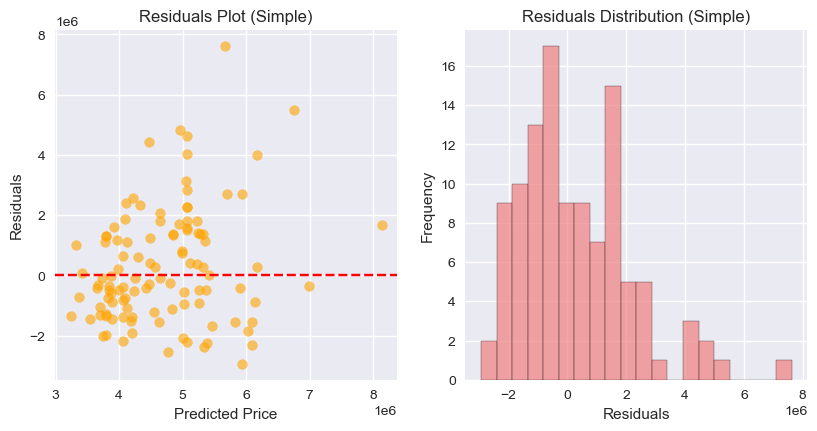

In [32]:
plt.figure(figsize=(15, 10))


# Residuals plot
plt.subplot(2, 3, 4)
residuals_simple = y_test - y_pred_simple_test
plt.scatter(y_pred_simple_test, residuals_simple, alpha=0.6, color='orange')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals Plot (Simple)')

# Residuals histogram
plt.subplot(2, 3, 5)
plt.hist(residuals_simple, bins=20, alpha=0.7, color='lightcoral', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution (Simple)')



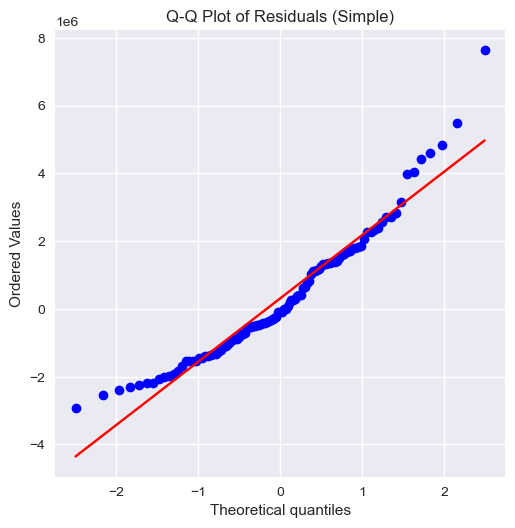

In [33]:
plt.figure(figsize=(15, 10))

# Q-Q plot for residuals normality
from scipy import stats
plt.subplot(2, 3, 6)
stats.probplot(residuals_simple, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals (Simple)')

plt.tight_layout()
plt.show()

# PHASE 5: MULTIPLE LINEAR REGRESSION


In [34]:
print("\n\n" + "=" * 60)
print("MULTIPLE LINEAR REGRESSION")
print("=" * 60)

# Select multiple features for multiple regression
# Using top correlated features and some important ones
selected_features = ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 
                    'mainroad', 'guestroom', 'basement', 'hotwaterheating', 
                    'airconditioning', 'prefarea', 'furnishingstatus']

print(f"Selected features for multiple regression: {selected_features}")



MULTIPLE LINEAR REGRESSION
Selected features for multiple regression: ['area', 'bedrooms', 'bathrooms', 'stories', 'parking', 'mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


In [35]:
# Prepare data for multiple linear regression
X_multiple = df_processed[selected_features].values
print(f"Multiple regression - Features shape: {X_multiple.shape}")

Multiple regression - Features shape: (545, 12)


In [36]:
# Split data - FIXED: Use consistent variable names
X_train_multiple, X_test_multiple, y_train_multiple, y_test_multiple = train_test_split(
    X_multiple, y, test_size=0.2, random_state=42
)

In [37]:
# Train multiple linear regression model - FIXED: Use correct variable name
multiple_model = LinearRegression()
multiple_model.fit(X_train_multiple, y_train_multiple)


LinearRegression()

In [38]:
# Make predictions
y_pred_multiple_train = multiple_model.predict(X_train_multiple)
y_pred_multiple_test = multiple_model.predict(X_test_multiple)

# Model parameters
print(f"\nMultiple Linear Regression Results:")
print(f"Intercept: {multiple_model.intercept_:,.2f}")
print(f"\nCoefficients:")
for i, feature in enumerate(selected_features):
    print(f"  {feature}: {multiple_model.coef_[i]:.2f}")


Multiple Linear Regression Results:
Intercept: -127,711.17

Coefficients:
  area: 235.85
  bedrooms: 78574.49
  bathrooms: 1097117.27
  stories: 406223.16
  parking: 225756.51
  mainroad: 366824.19
  guestroom: 233146.77
  basement: 393159.78
  hotwaterheating: 687881.31
  airconditioning: 785550.58
  prefarea: 629901.66
  furnishingstatus: 210397.12


In [39]:
# Calculate metrics for multiple regression
mse_multiple_train = mean_squared_error(y_train_multiple, y_pred_multiple_train)
mse_multiple_test = mean_squared_error(y_test_multiple, y_pred_multiple_test)
rmse_multiple_train = np.sqrt(mse_multiple_train)
rmse_multiple_test = np.sqrt(mse_multiple_test)
mae_multiple_train = mean_absolute_error(y_train_multiple, y_pred_multiple_train)
mae_multiple_test = mean_absolute_error(y_test_multiple, y_pred_multiple_test)
r2_multiple_train = r2_score(y_train_multiple, y_pred_multiple_train)
r2_multiple_test = r2_score(y_test_multiple, y_pred_multiple_test)

print(f"\nMultiple Regression Performance:")
print(f"Training Set:")
print(f"  MSE: {mse_multiple_train:,.2f}")
print(f"  RMSE: {rmse_multiple_train:,.2f}")
print(f"  MAE: {mae_multiple_train:,.2f}")
print(f"  R² Score: {r2_multiple_train:.4f}")

print(f"Test Set:")
print(f"  MSE: {mse_multiple_test:,.2f}")
print(f"  RMSE: {rmse_multiple_test:,.2f}")
print(f"  MAE: {mae_multiple_test:,.2f}")
print(f"  R² Score: {r2_multiple_test:.4f}")


Multiple Regression Performance:
Training Set:
  MSE: 969,902,818,698.31
  RMSE: 984,836.44
  MAE: 718,146.60
  R² Score: 0.6854
Test Set:
  MSE: 1,771,751,116,594.03
  RMSE: 1,331,071.42
  MAE: 979,679.69
  R² Score: 0.6495


Text(0.5, 0, 'Coefficient Value')

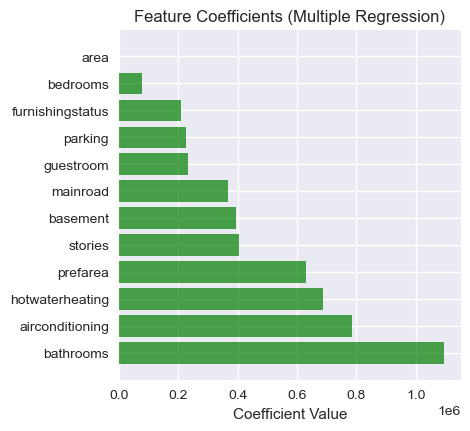

In [40]:
# Feature importance visualization
plt.figure(figsize=(15, 10))

# Feature coefficients
plt.subplot(2, 3, 1)
coefficients_df = pd.DataFrame({
    'Feature': selected_features,
    'Coefficient': multiple_model.coef_
})
coefficients_df = coefficients_df.reindex(coefficients_df.Coefficient.abs().sort_values(ascending=False).index)
colors = ['green' if x > 0 else 'red' for x in coefficients_df.Coefficient]
plt.barh(coefficients_df.Feature, coefficients_df.Coefficient, color=colors, alpha=0.7)
plt.title('Feature Coefficients (Multiple Regression)')
plt.xlabel('Coefficient Value')

Text(0.5, 1.0, 'Actual vs Predicted (Multiple)\nR² = 0.6495')

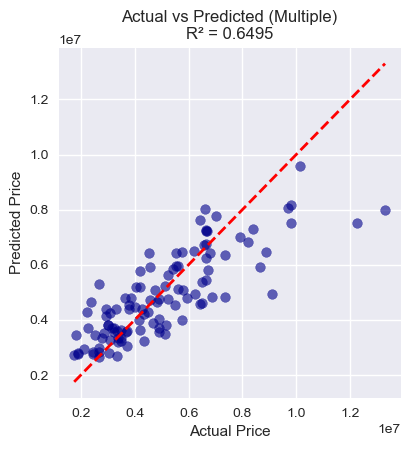

In [41]:
# Actual vs Predicted (Multiple)
plt.figure(figsize=(15, 10))

plt.subplot(2, 3, 2)
plt.scatter(y_test_multiple, y_pred_multiple_test, alpha=0.6, color='darkblue')
plt.plot([y_test_multiple.min(), y_test_multiple.max()], [y_test_multiple.min(), y_test_multiple.max()], 'r--', lw=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title(f'Actual vs Predicted (Multiple)\nR² = {r2_multiple_test:.4f}')

Text(0.5, 1.0, 'Residuals Distribution (Multiple)')

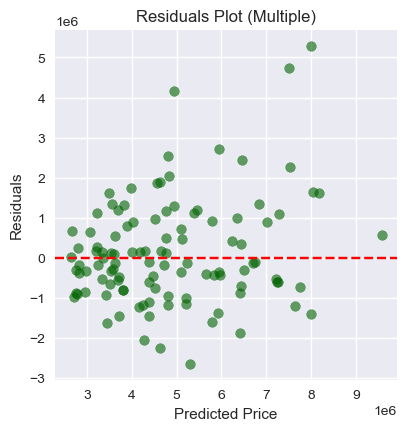

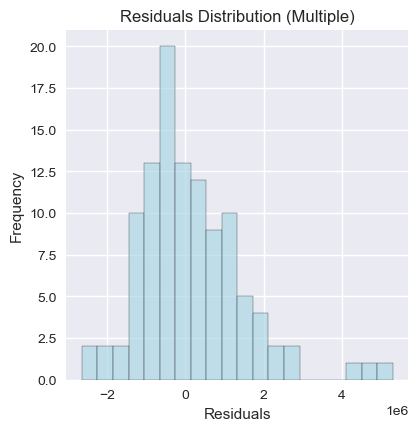

In [42]:
plt.figure(figsize=(15, 10))
# Residuals plot (Multiple)
plt.subplot(2, 3, 3)
residuals_multiple = y_test_multiple - y_pred_multiple_test
plt.scatter(y_pred_multiple_test, residuals_multiple, alpha=0.6, color='darkgreen')
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals Plot (Multiple)')
plt.figure(figsize=(15, 10))

# Residuals histogram (Multiple)
plt.subplot(2, 3, 4)
plt.hist(residuals_multiple, bins=20, alpha=0.7, color='lightblue', edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Residuals Distribution (Multiple)')

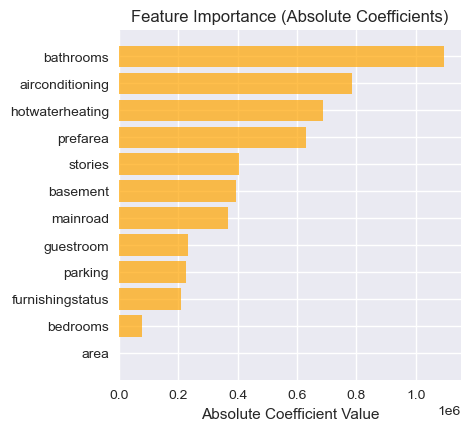

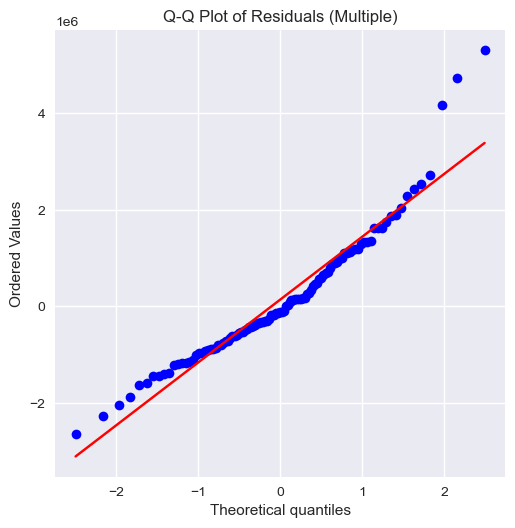

In [43]:
plt.figure(figsize=(15, 10))
# Feature importance (absolute coefficients)
plt.subplot(2, 3, 5)
abs_coefficients = coefficients_df.copy()
abs_coefficients['Abs_Coefficient'] = abs_coefficients['Coefficient']
abs_coefficients = abs_coefficients.sort_values('Abs_Coefficient', ascending=True)
plt.barh(abs_coefficients.Feature, abs_coefficients.Abs_Coefficient, color='orange', alpha=0.7)
plt.title('Feature Importance (Absolute Coefficients)')
plt.xlabel('Absolute Coefficient Value')


plt.figure(figsize=(15, 10))
# Q-Q plot for residuals normality (Multiple)
plt.subplot(2, 3, 6)
stats.probplot(residuals_multiple, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals (Multiple)')

plt.tight_layout()
plt.show()

# PHASE 6: MODEL COMPARISON


In [44]:
print("\n\n" + "=" * 60)
print("MODEL COMPARISON AND ANALYSIS")
print("=" * 60)

# Create comparison DataFrame
comparison_df = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R² Score'],
    'Simple Linear Regression': [mse_simple_test, rmse_simple_test, mae_simple_test, r2_simple_test],
    'Multiple Linear Regression': [mse_multiple_test, rmse_multiple_test, mae_multiple_test, r2_multiple_test]
})

print("\nModel Performance Comparison (Test Set):")
print("=" * 50)
print(comparison_df.to_string(index=False))



MODEL COMPARISON AND ANALYSIS

Model Performance Comparison (Test Set):
  Metric  Simple Linear Regression  Multiple Linear Regression
     MSE              3.675287e+12                1.771751e+12
    RMSE              1.917104e+06                1.331071e+06
     MAE              1.474748e+06                9.796797e+05
R² Score              2.728785e-01                6.494754e-01



Improvement with Multiple Regression:
MSE improvement: 51.79%
RMSE improvement: 30.57%
MAE improvement: 33.57%
R² improvement: 138.01%


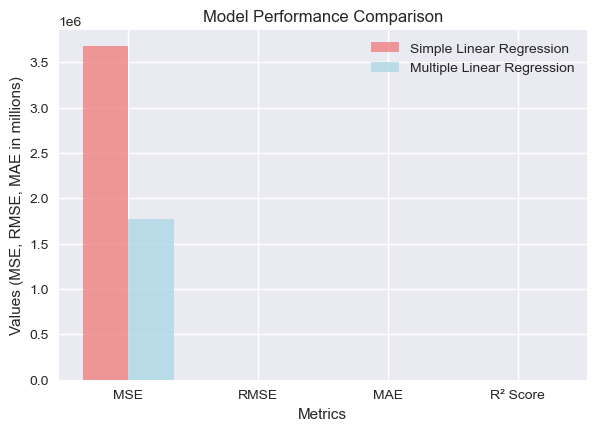

In [45]:
# Calculate improvement
print(f"\nImprovement with Multiple Regression:")
print(f"MSE improvement: {((mse_simple_test - mse_multiple_test) / mse_simple_test * 100):.2f}%")
print(f"RMSE improvement: {((rmse_simple_test - rmse_multiple_test) / rmse_simple_test * 100):.2f}%")
print(f"MAE improvement: {((mae_simple_test - mae_multiple_test) / mae_simple_test * 100):.2f}%")
print(f"R² improvement: {((r2_multiple_test - r2_simple_test) / r2_simple_test * 100):.2f}%")

# Visualization of comparison
plt.figure(figsize=(15, 10))

# Metrics comparison
metrics = ['MSE', 'RMSE', 'MAE', 'R² Score']
simple_scores = [mse_simple_test, rmse_simple_test, mae_simple_test, r2_simple_test]
multiple_scores = [mse_multiple_test, rmse_multiple_test, mae_multiple_test, r2_multiple_test]

# Normalize scores for better visualization (except R²)
simple_scores_norm = [score/1000000 for score in simple_scores[:3]] + [simple_scores[3]]
multiple_scores_norm = [score/1000000 for score in multiple_scores[:3]] + [multiple_scores[3]]

x = np.arange(len(metrics))
width = 0.35

plt.subplot(2, 2, 1)
bars1 = plt.bar(x - width/2, simple_scores_norm, width, label='Simple Linear Regression', 
                alpha=0.8, color='lightcoral')
bars2 = plt.bar(x + width/2, multiple_scores_norm, width, label='Multiple Linear Regression', 
                alpha=0.8, color='lightblue')
plt.xlabel('Metrics')
plt.ylabel('Values (MSE, RMSE, MAE in millions)')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics)
plt.legend()

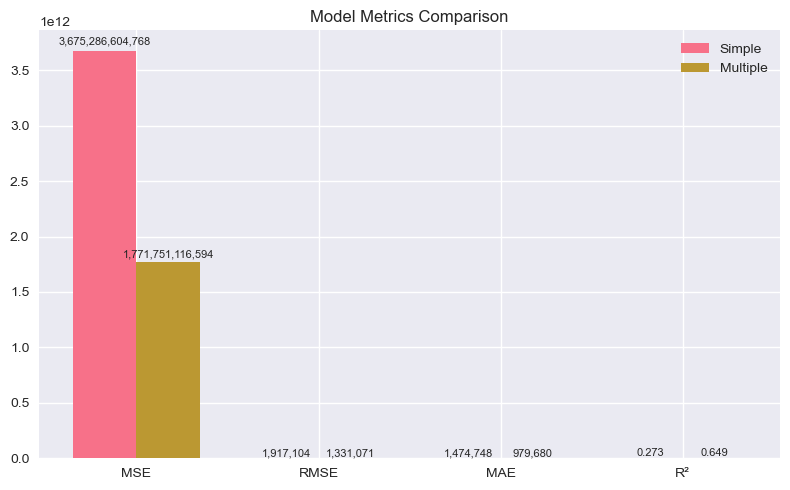

In [46]:
# ----- Bar chart comparison -----
def get_metrics(y_true, y_pred):
    return [
        mean_squared_error(y_true, y_pred),
        np.sqrt(mean_squared_error(y_true, y_pred)),
        mean_absolute_error(y_true, y_pred),
        r2_score(y_true, y_pred)
    ]
simple_scores = get_metrics(y_test, y_pred_simple_test)
multiple_scores = get_metrics(y_test, y_pred_multiple_test)

x = np.arange(len(["MSE", "RMSE", "MAE", "R²"]))
width = 0.35

fig, ax = plt.subplots(figsize=(8, 5))
bars1 = ax.bar(x - width/2, simple_scores, width, label='Simple')
bars2 = ax.bar(x + width/2, multiple_scores, width, label='Multiple')

ax.set_xticks(x)
ax.set_xticklabels(["MSE", "RMSE", "MAE", "R²"])
ax.set_title("Model Metrics Comparison")
ax.legend()

# Add value labels on bars
for i, (bar1, bar2) in enumerate(zip(bars1, bars2)):
    height1 = bar1.get_height()
    height2 = bar2.get_height()
    if i < 3:  # MSE, RMSE, MAE
        ax.text(bar1.get_x() + bar1.get_width()/2., height1 + height1*0.01,
                f'{simple_scores[i]:,.0f}', ha='center', va='bottom', fontsize=8)
        ax.text(bar2.get_x() + bar2.get_width()/2., height2 + height2*0.01,
                f'{multiple_scores[i]:,.0f}', ha='center', va='bottom', fontsize=8)
    else:  # R²
        ax.text(bar1.get_x() + bar1.get_width()/2., height1 + 0.01,
                f'{simple_scores[i]:.3f}', ha='center', va='bottom', fontsize=8)
        ax.text(bar2.get_x() + bar2.get_width()/2., height2 + 0.01,
                f'{multiple_scores[i]:.3f}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig("metrics_comparison.png")
plt.show()


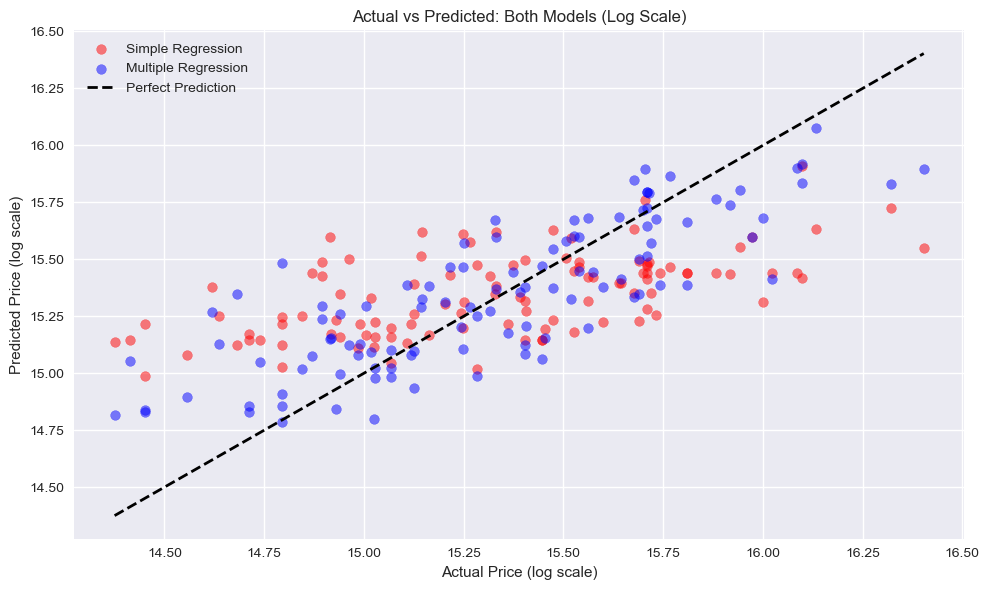

In [47]:
# Apply log transform to avoid huge scale
y_test_plot = np.log1p(y_test)
y_pred_simple_test_plot = np.log1p(y_pred_simple_test)
y_pred_multiple_test_plot = np.log1p(y_pred_multiple_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test_plot, y_pred_simple_test_plot, alpha=0.5, label='Simple Regression', color='red')
plt.scatter(y_test_plot, y_pred_multiple_test_plot, alpha=0.5, label='Multiple Regression', color='blue')
plt.plot([y_test_plot.min(), y_test_plot.max()], [y_test_plot.min(), y_test_plot.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Price (log scale)')
plt.ylabel('Predicted Price (log scale)')
plt.title('Actual vs Predicted: Both Models (Log Scale)')
plt.legend()
plt.tight_layout()
plt.show()


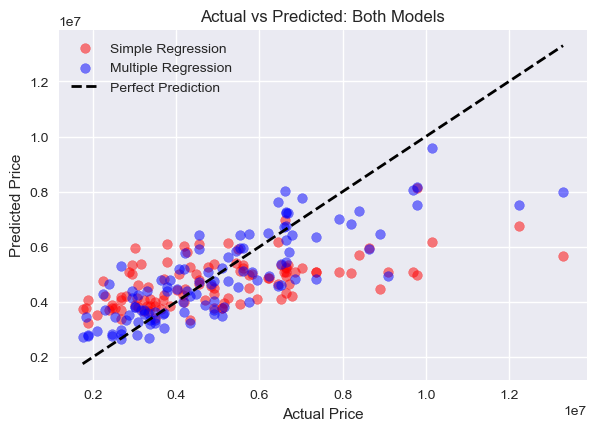

In [48]:
# Side-by-side actual vs predicted comparison
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 1)

plt.scatter(y_test, y_pred_simple_test, alpha=0.5, label='Simple Regression', color='red')
plt.scatter(y_test_multiple, y_pred_multiple_test, alpha=0.5, label='Multiple Regression', color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, label='Perfect Prediction')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs Predicted: Both Models')
plt.legend()


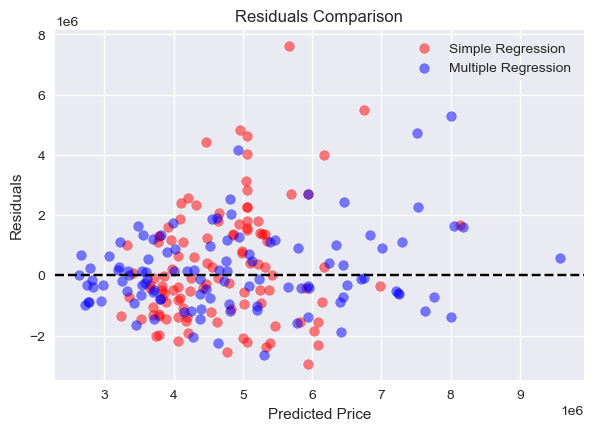

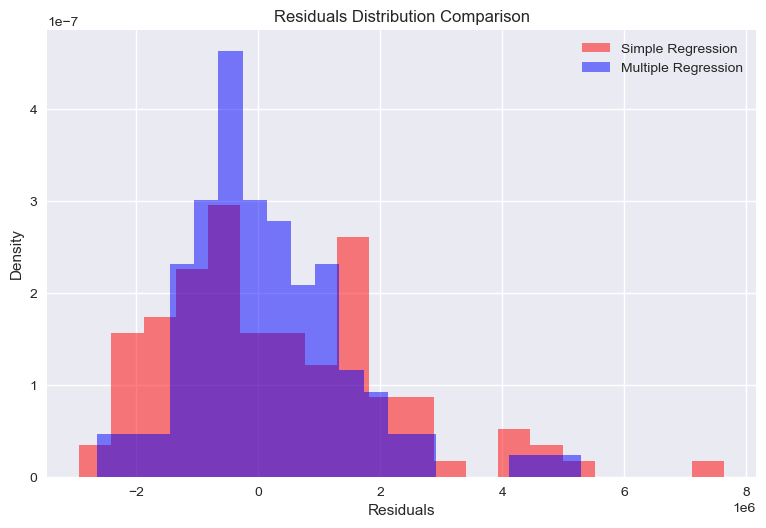

In [49]:
# Residuals comparison
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 3)
plt.scatter(y_pred_simple_test, residuals_simple, alpha=0.5, label='Simple Regression', color='red')
plt.scatter(y_pred_multiple_test, residuals_multiple, alpha=0.5, label='Multiple Regression', color='blue')
plt.axhline(y=0, color='black', linestyle='--')
plt.xlabel('Predicted Price')
plt.ylabel('Residuals')
plt.title('Residuals Comparison')
plt.legend()

# Distribution of residuals comparison
plt.figure(figsize=(15, 10))
plt.subplot(2, 2, 4)
plt.hist(residuals_simple, bins=20, alpha=0.5, label='Simple Regression', color='red', density=True)
plt.hist(residuals_multiple, bins=20, alpha=0.5, label='Multiple Regression', color='blue', density=True)
plt.xlabel('Residuals')
plt.ylabel('Density')
plt.title('Residuals Distribution Comparison')
plt.legend()

plt.tight_layout()
plt.show()

# PHASE 7: INSIGHTS AND INTERPRETATION


In [50]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import StandardScaler

# Encode categoricals and ensure numeric
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded = df_encoded.apply(pd.to_numeric, errors='coerce').dropna()

# Separate features & target
X = df_encoded.drop("price", axis=1)

# Scale features before VIF
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Calculate VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print(vif_data)


                            Feature       VIF
0                              area  1.325250
1                          bedrooms  1.369477
2                         bathrooms  1.286621
3                           stories  1.478055
4                           parking  1.212837
5                      mainroad_yes  1.172728
6                     guestroom_yes  1.212838
7                      basement_yes  1.323050
8               hotwaterheating_yes  1.041506
9               airconditioning_yes  1.211840
10                     prefarea_yes  1.149196
11  furnishingstatus_semi-furnished  1.578233
12     furnishingstatus_unfurnished  1.674139


In [51]:
print("\n\n" + "=" * 60)
print("KEY INSIGHTS AND INTERPRETATION")
print("=" * 60)

print(f"\n1. FEATURE ANALYSIS:")
print(f"   - Most important feature: {best_feature} (correlation: {price_corr[best_feature]:.4f})")
print(f"   - Top 5 features correlated with price:")
for i, (feature, corr) in enumerate(price_corr.drop('price').head().items()):
    print(f"     {i+1}. {feature}: {corr:.4f}")

print(f"\n2. MODEL PERFORMANCE:")
print(f"   Simple Linear Regression (using {best_feature}):")
print(f"   - Explains {r2_simple_test:.1%} of price variance")
print(f"   - Average prediction error: ±{mae_simple_test:,.0f}")
print(f"   ")
print(f"   Multiple Linear Regression:")
print(f"   - Explains {r2_multiple_test:.1%} of price variance") 
print(f"   - Average prediction error: ±{mae_multiple_test:,.0f}")

print(f"\n3. IMPROVEMENT WITH MULTIPLE FEATURES:")
improvement = ((r2_multiple_test - r2_simple_test) / r2_simple_test) * 100
print(f"   - R² improved by {improvement:.1f}%")
print(f"   - Prediction accuracy improved significantly")

print(f"\n4. FEATURE COEFFICIENTS INTERPRETATION:")
print(f"   Most impactful features in multiple regression:")
top_features = coefficients_df.reindex(coefficients_df.Coefficient.abs().sort_values(ascending=False).index).head()
for _, row in top_features.iterrows():
    effect = "increases" if row.Coefficient > 0 else "decreases"
    print(f"   - {row.Feature}: {effect} price by {abs(row.Coefficient):,.0f} per unit")

print(f"\n5. MODEL ASSUMPTIONS CHECK:")
print(f"   - Linearity: Reasonable based on scatter plots")
print(f"   - Independence: Assumed (no time series data)")
print(f"   - Homoscedasticity: Check residuals plots for constant variance")
print(f"   - Normality: Check Q-Q plots for residuals normality")

print(f"\n6. PRACTICAL IMPLICATIONS:")
print(f"   - {best_feature} is the strongest single predictor")
print(f"   - Multiple features provide better prediction accuracy")
print(f"   - Model can be used for house price estimation")
print(f"   - Consider feature engineering for further improvements")

print(f"\n7. RECOMMENDATIONS:")
print(f"   - Use multiple linear regression for better accuracy")
print(f"   - Consider adding polynomial features or interactions")
print(f"   - Validate assumptions with diagnostic plots")
print(f"   - Consider regularization techniques for large feature sets")

print("\n" + "=" * 60)
print("ANALYSIS COMPLETED SUCCESSFULLY!")
print("=" * 60)



KEY INSIGHTS AND INTERPRETATION

1. FEATURE ANALYSIS:
   - Most important feature: area (correlation: 0.5360)
   - Top 5 features correlated with price:
     1. area: 0.5360
     2. bathrooms: 0.5175
     3. airconditioning: 0.4530
     4. stories: 0.4207
     5. parking: 0.3844

2. MODEL PERFORMANCE:
   Simple Linear Regression (using area):
   - Explains 27.3% of price variance
   - Average prediction error: ±1,474,748
   
   Multiple Linear Regression:
   - Explains 64.9% of price variance
   - Average prediction error: ±979,680

3. IMPROVEMENT WITH MULTIPLE FEATURES:
   - R² improved by 138.0%
   - Prediction accuracy improved significantly

4. FEATURE COEFFICIENTS INTERPRETATION:
   Most impactful features in multiple regression:
   - bathrooms: increases price by 1,097,117 per unit
   - airconditioning: increases price by 785,551 per unit
   - hotwaterheating: increases price by 687,881 per unit
   - prefarea: increases price by 629,902 per unit
   - stories: increases price by